In [3]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string 

In [4]:
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

In [5]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [6]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [7]:
df_fake['class'] = 0
df_true['class'] = 1

In [8]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [9]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470, -1):
    df_fake.drop([i], axis=0, inplace=True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis=0, inplace=True)

In [10]:
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis=0)
df_manual_testing.to_csv('manual_testing.csv')

In [11]:
df_merge = pd.concat([df_fake,df_true], axis=0)
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [12]:
df = df_merge.drop(['title', 'subject', 'date'], axis=1)
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [13]:
df = df.sample(frac=1)

In [14]:
df.head(10)

,text,class
16613,MADRID (Reuters) - The Catalan government is c...,1
13382,B..b..but That can t be right Maybe we should ...,0
2328,Ever since the courts blocked Donald Trump s r...,0
5830,"When Jared Yates Sexton, a professor of creati...",0
5989,When Donald Trump began his one-man quest to s...,0
8697,During an interview on CNN s State of the Unio...,0
18728,"DHAKA/KUTUPALONG, Bangladesh (Reuters) - How d...",1
14462,PARIS (Reuters) - France is considering whethe...,1
9932,Leftist activist and mediocre filmmaker Michae...,0
12660,All of the tracking polls keep holding at Tru...,0


In [15]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [16]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\\W',' ',text)
    text = re.sub('https?:\\/S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [17]:
df['text'] = df['text'].apply(word_drop)

In [18]:
df.head(10)

,text,class
16613,madrid reuters the catalan government is c...,1
13382,b b but that can t be right maybe we should ...,0
2328,ever since the courts blocked donald trump s r...,0
5830,when jared yates sexton a professor of creati...,0
5989,when donald trump began his one man quest to s...,0
8697,during an interview on cnn s state of the unio...,0
18728,dhaka kutupalong bangladesh reuters how d...,1
14462,paris reuters france is considering whethe...,1
9932,leftist activist and mediocre filmmaker michae...,0
12660,all of the tracking polls keep holding at tru...,0


In [19]:
x = df['text']
y = df['class']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = .25)

In [21]:
#vectorize text 
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectorization =  TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [25]:
LR.score(xv_test,y_test)

0.9876114081996435

In [26]:
pred_LR=LR.predict(xv_test)

In [27]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5863
           1       0.99      0.99      0.99      5357

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [30]:
DT.score(xv_test, y_test)

0.996969696969697

In [31]:
pred_DT = DT.predict(xv_test)

In [32]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5863
           1       1.00      1.00      1.00      5357

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [33]:
from sklearn.linear_model import SGDClassifier
square = SGDClassifier(loss='squared_error', tol=0.01,random_state=0)
print(square)

SGDClassifier(loss='squared_error', random_state=0, tol=0.01)


In [34]:
square.fit(xv_train, y_train)

C:\Users\chaud\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='squared_error', random_state=0, tol=0.01)

In [35]:
square.score(xv_test, y_test)

0.6280748663101604

In [36]:
loss = SGDClassifier(loss="log_loss", tol=0.01, random_state=0)

In [37]:
loss.fit(xv_train, y_train)
loss.score(xv_test, y_test)

0.9803030303030303

In [38]:
hinge = SGDClassifier(loss="hinge", tol=0.01,random_state=0)

In [39]:
hinge.fit(xv_train, y_train)
hinge.score(xv_test, y_test)

0.9909982174688057

In [40]:
modified_huber=SGDClassifier(loss="modified_huber", tol=0.01,random_state=0)

In [41]:
modified_huber.fit(xv_train, y_train)
modified_huber.score(xv_test, y_test)

0.9934046345811052

In [42]:
2+2

4

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [45]:
GBC.score(xv_test,y_test)

0.9951871657754011

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [48]:
RFC.score(xv_test, y_test)

0.9877896613190731

In [49]:
2+2

4

In [50]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [51]:
PS = PassiveAggressiveClassifier(random_state=0)
PS.fit(xv_train, y_train)

PassiveAggressiveClassifier(random_state=0)

In [52]:
PS.score(xv_test, y_test)

0.9953654188948307

In [54]:
from sklearn.svm import SVC
rbf = SVC(kernel = 'rbf',random_state = 0)

In [55]:
rbf.fit(xv_train, y_train)

SVC(random_state=0)

In [57]:
 lir = SVC(kernel = 'linear',random_state = 0)
 lir.fit(xv_train, y_train)

SVC(kernel='linear', random_state=0)

In [58]:
rbf.score(xv_test, y_test)

0.9943850267379679

In [59]:
lir.score(xv_test, y_test)

0.9942067736185384

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
 neigh = KNeighborsClassifier(n_neighbors=3)

In [63]:
neigh.fit(xv_test, y_test)

KNeighborsClassifier(n_neighbors=3)

In [64]:
neigh.score(xv_test, y_test)

0.7402852049910873

In [4]:
import matplotlib.pyplot as plt


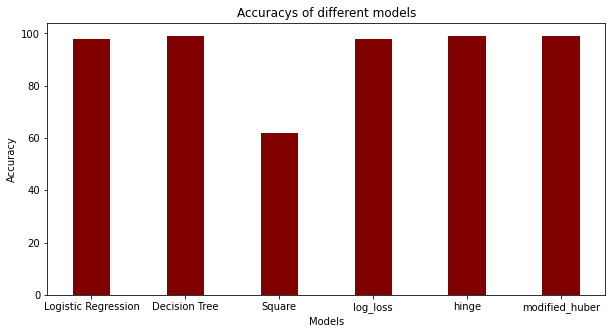

In [13]:
# creating the dataset
data = {'Logistic Regression':98, 'Decision Tree':99, 'Square':62,
        'log_loss':98, 'hinge':99, 'modified_huber':99}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracys of different models")
plt.show()

y=['one', 'two', 'three', 'four', 'five']
 
# getting values against each value of y
x=[5,24,35,67,12]
plt.barh(y, x)
 
# setting label of y-axis
plt.ylabel("pen sold")
 
# setting label of x-axis
plt.xlabel("price")
plt.title("Horizontal bar graph")
plt.show()

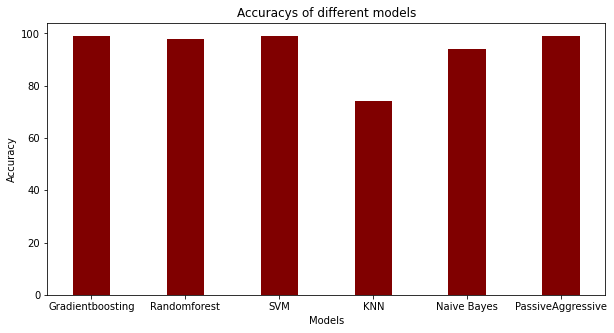

In [15]:
data = {'Gradientboosting':99, 'Randomforest':98, 'SVM':99,
        'KNN':74, 'Naive Bayes':94,'PassiveAggressive':99}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracys of different models")
plt.show()

4